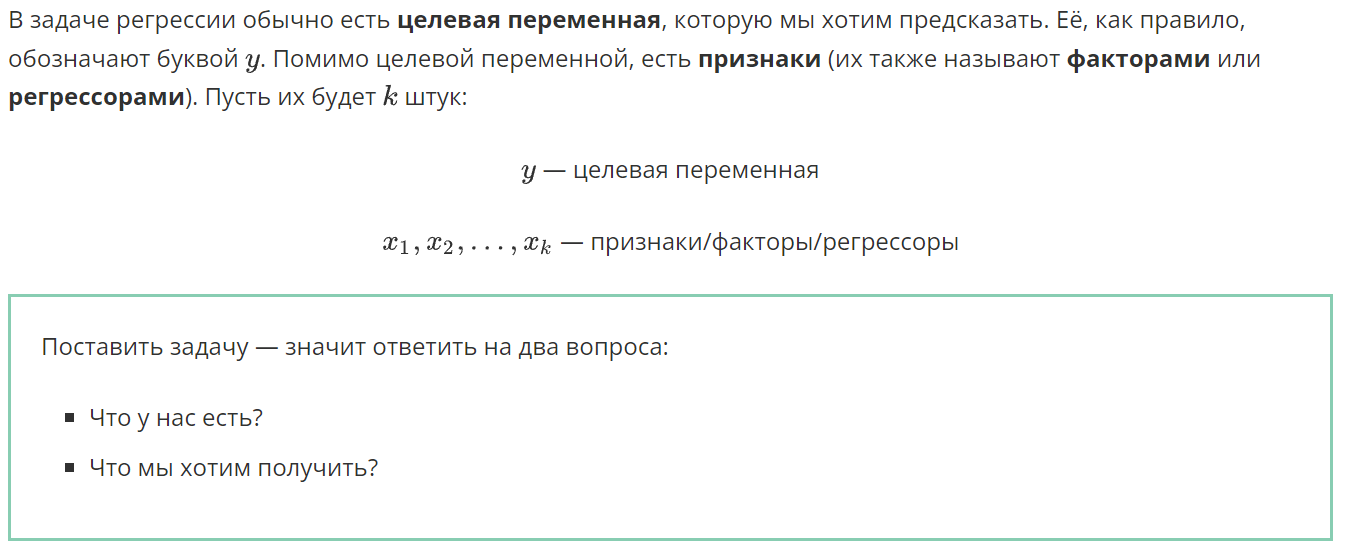

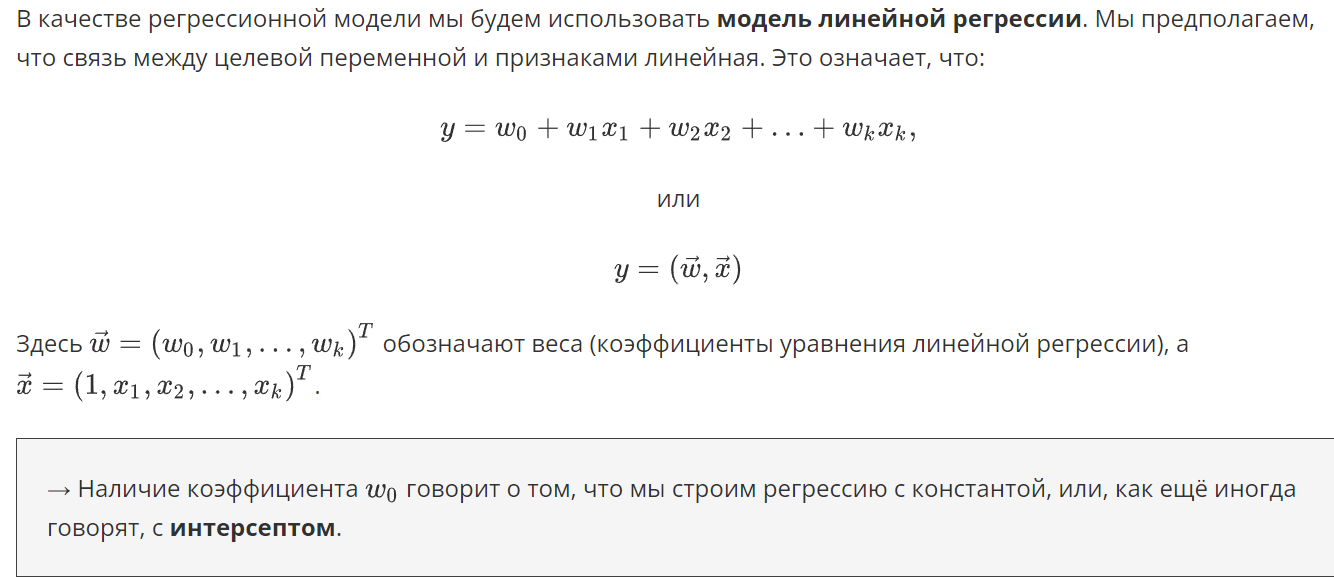

 Полученной СЛАУ можно дать геометрическую интерпретацию. Если представить каждое наблюдение в виде точки на графике (см. ниже), то уравнение линейной регрессии будет задавать прямую (если фактор один) или гиперплоскость (если факторов  штук). Приравняв уравнение прямой к целевому признаку, мы потребовали, чтобы эта прямая проходила через все точки в нашем наборе данных. Конечно же, это условие не может быть выполнено полностью, так как в данных всегда присутствует какой-то шум, и идеальной прямой (гиперплоскости) не получится, но зато можно построить приближённое решение.
 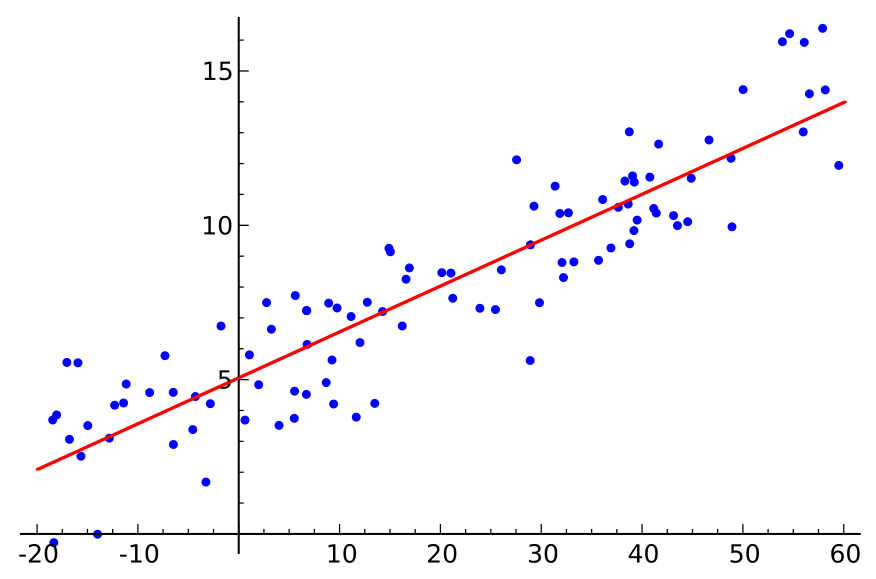

Обратите внимание, что у нас появился новый вектор из единиц. Он здесь из-за того, что мы взяли модель с интерсептом. Можно считать, что это новый регрессор-константа. Данная константа тянется из уравнения прямой, которое мы разбирали в модуле «ML-2. Обучение с учителем: регрессия».

In [8]:
# Загрузка библиотек
import numpy as np # для работы с массивами
import pandas as pd # для работы с DataFrame 
from sklearn import datasets # для импорта данных
import seaborn as sns # для визуализации статистических данных
import matplotlib.pyplot as plt # для построения графиков

# загружаем датасет
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'PRICE']
boston_data = pd.read_csv('data/housing.csv', header=None, delimiter=r"\s+", names=column_names)
boston_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


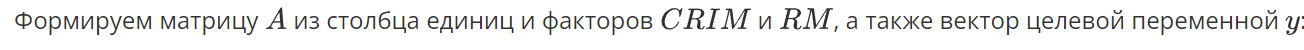

In [9]:
# составляем матрицу А и вектор целевой переменной
CRIM = boston_data['CRIM']
RM = boston_data['RM']
A = np.column_stack((np.ones(506), CRIM, RM))
y = boston_data[['PRICE']]
print(A)

[[1.0000e+00 6.3200e-03 6.5750e+00]
 [1.0000e+00 2.7310e-02 6.4210e+00]
 [1.0000e+00 2.7290e-02 7.1850e+00]
 ...
 [1.0000e+00 6.0760e-02 6.9760e+00]
 [1.0000e+00 1.0959e-01 6.7940e+00]
 [1.0000e+00 4.7410e-02 6.0300e+00]]


In [10]:
# проверим размерность
print(A.shape)
## (506, 3)

(506, 3)


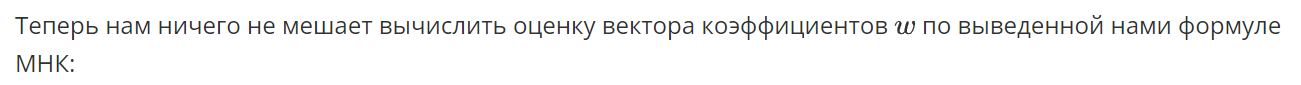

In [11]:
# вычислим OLS-оценку для коэффициентов
w_hat = np.linalg.inv(A.T@A)@A.T@y
print(w_hat.values)

[[-29.24471945]
 [ -0.26491325]
 [  8.39106825]]


Теперь составим прогноз нашей модели:

In [12]:
# добавились новые данные:
CRIM_new = 0.1
RM_new = 8
# делаем прогноз типичной стоимости дома
PRICE_new = w_hat.iloc[0]+w_hat.iloc[1]*CRIM_new+w_hat.iloc[2]*RM_new
print(PRICE_new.values)
## [37.85733519]

[37.85733519]


→ Согласитесь, такая запись вычисления оценки стоимости слишком длинная и неудобная, особенно если факторов не два, как у нас, а 200. Более короткий способ сделать прогноз — вычислить скалярное произведение вектора признаков и коэффициентов регрессии.

Для удобства дальнейшего использования оформим характеристики нового наблюдения в виде матрицы размером (1,3):

In [13]:
# короткий способ сделать прогноз
new=np.array([[1,CRIM_new,RM_new]])
print('prediction:', (new@w_hat).values)
## prediction: [[37.85733519]]

prediction: [[37.85733519]]


Примечание. Обратите внимание, что, решая задачу с помощью Python, мы получили немного другой результат прогноза стоимости. Это связано с тем, что при выполнении ручного расчёта мы округлили значения коэффициентов и получили менее точный результат.

Мы уже знаем, что алгоритм построения модели линейной регрессии по МНК реализован в классе LinearRegression, находящемся в модуле sklearn.linear_model. Для вычисления коэффициентов (обучения модели) нам достаточно передать в метод fit() нашу матрицу с наблюдениями и вектор целевой переменной, а для построения прогноза — вызвать метод predict():

In [14]:
from sklearn.linear_model import LinearRegression
# создаём модель линейной регрессии
model = LinearRegression(fit_intercept=False)
# вычисляем коэффициенты регрессии
model.fit(A, y)
print('w_hat:', model.coef_)
new_prediction = model.predict(new)
print('prediction:', new_prediction)
## w_hat: [[-29.24471945  -0.26491325   8.39106825]]
## prediction: [[37.85733519]]

w_hat: [[-29.24471945  -0.26491325   8.39106825]]
prediction: [[37.85733519]]


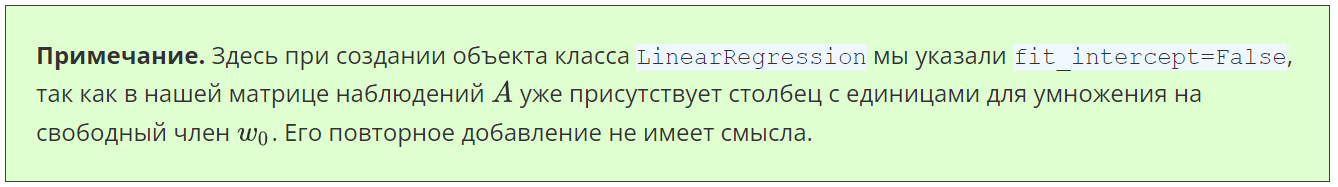

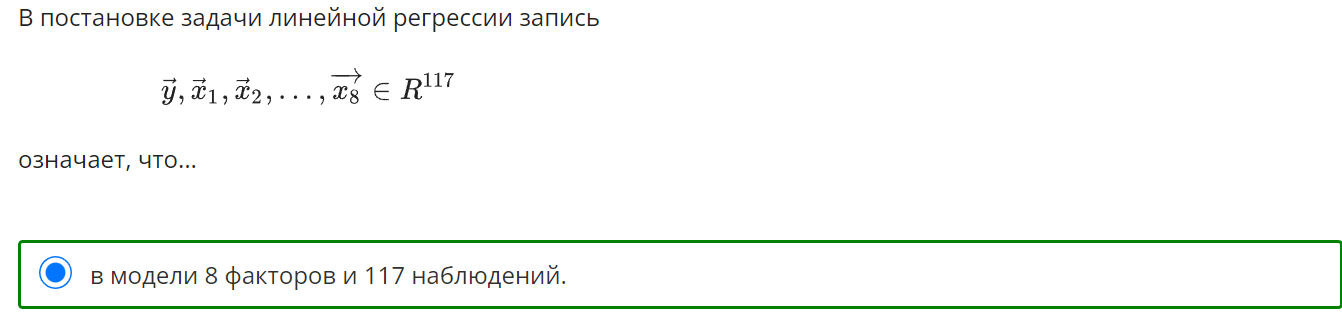

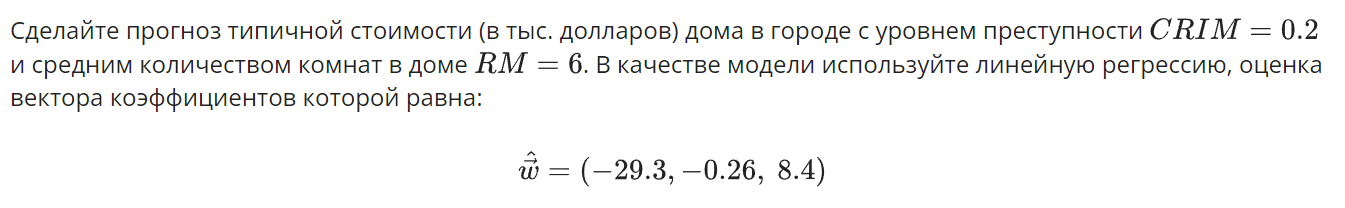
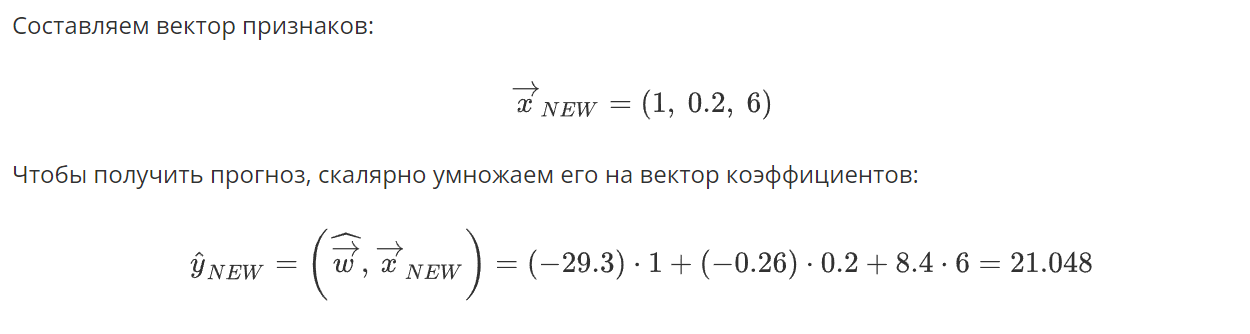

# ПРОБЛЕМЫ В КЛАССИЧЕСКОЙ МНК-МОДЕЛИ



Давайте посмотрим, что «скажет» Python, если мы попробуем построить модель линейной регрессии на вырожденной матрице наблюдений, используя классическую формулу линейной регрессии.

In [15]:
# создадим вырожденную матрицу А
A = np.array([
    [1, 1, 1, 1], 
    [2, 1, 1, 2], 
    [-2, -1, -1, -2]]
).T
y = np.array([1, 2, 5, 1])
# вычислим OLS-оценку для коэффициентов
w_hat=np.linalg.inv(A.T@A)@A.T@y
print(w_hat) 
## LinAlgError: Singular matrix

LinAlgError: Singular matrix

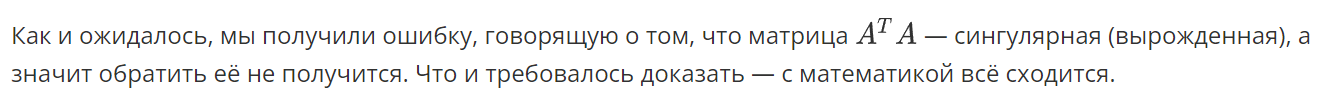

Попробуем обучить модель линейной регрессии LinearRegression из модуля sklearn, используя нашу вырожденную матрицу A:

In [16]:
# создаём модель линейной регрессии
model = LinearRegression(fit_intercept=False)
# вычисляем коэффициенты регрессии
model.fit(A, y)
print('w_hat:', model.coef_)
## w_hat: [ 6.   -1.25  1.25]

w_hat: [ 6.   -1.25  1.25]


На самом деле, не совсем. Здесь нет никакой магии, ошибки округления или бага. Просто в реализации линейной регрессии в sklearn предусмотрена борьба с плохо определёнными (близкими к вырожденным и вырожденными) матрицами.

Для этого используется метод под названием сингулярное разложение (SVD). О нём мы будем говорить отдельно, однако уже сейчас отметим тот факт, что данный метод позволяет всегда получать корректные значения при обращении матриц.

Если вы хотите понять, почему так происходит, ознакомьтесь с [этой статьёй](https://towardsdatascience.com/understanding-linear-regression-using-the-singular-value-decomposition-1f37fb10dd33).

Суть метода заключается в том, что в OLS-формуле мы на самом деле используем не саму матрицу , а её диагональное представление из сингулярного разложения, которое гарантированно является невырожденным. Вот и весь секрет.

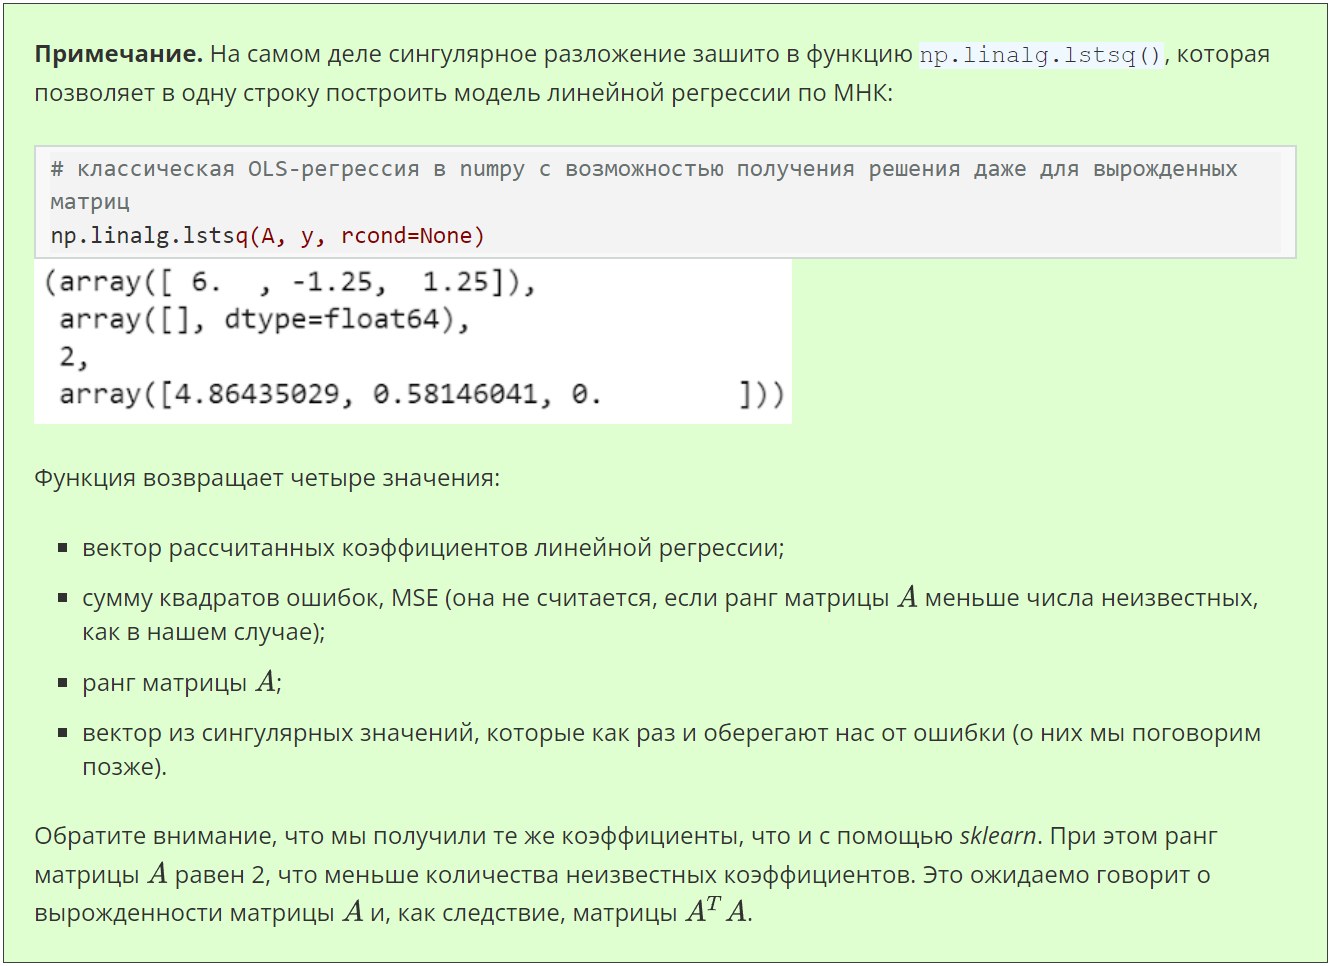

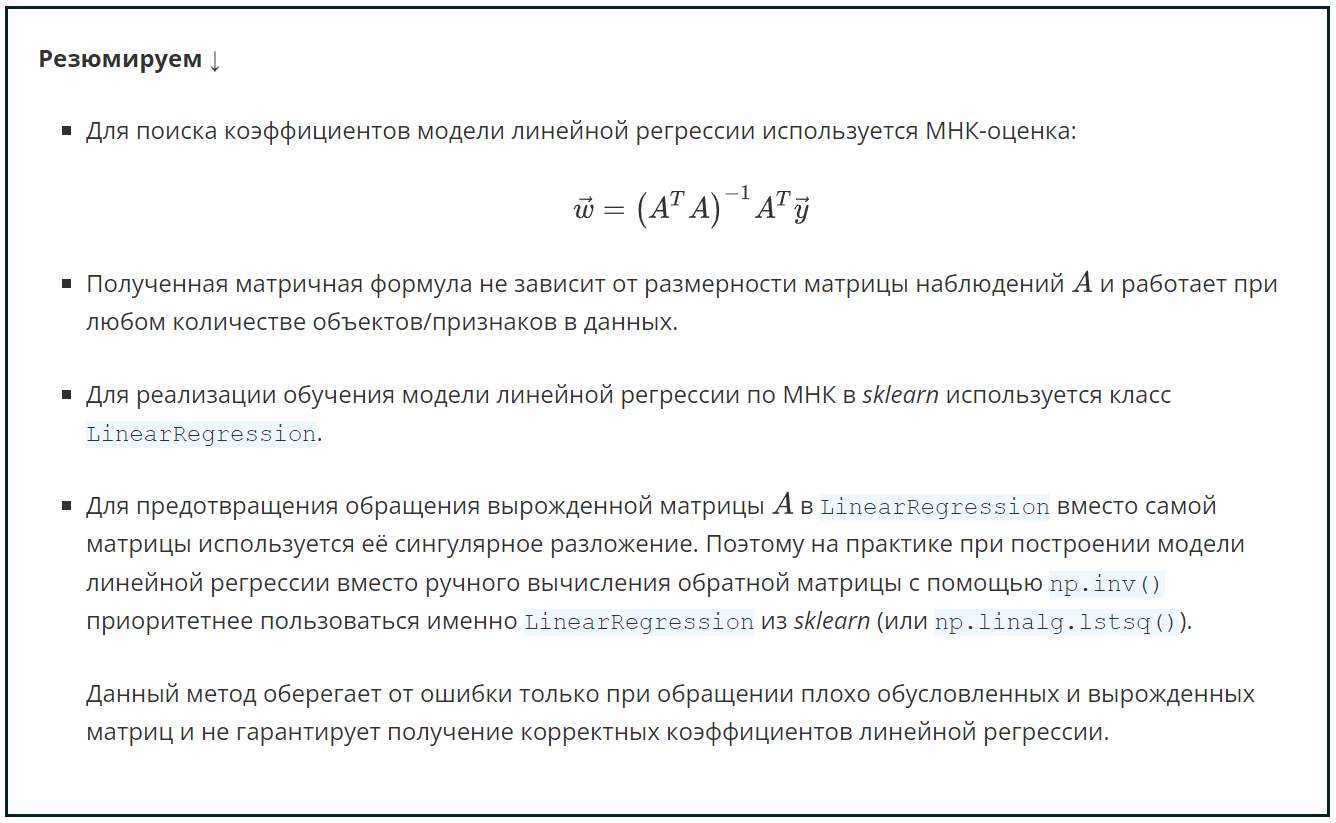

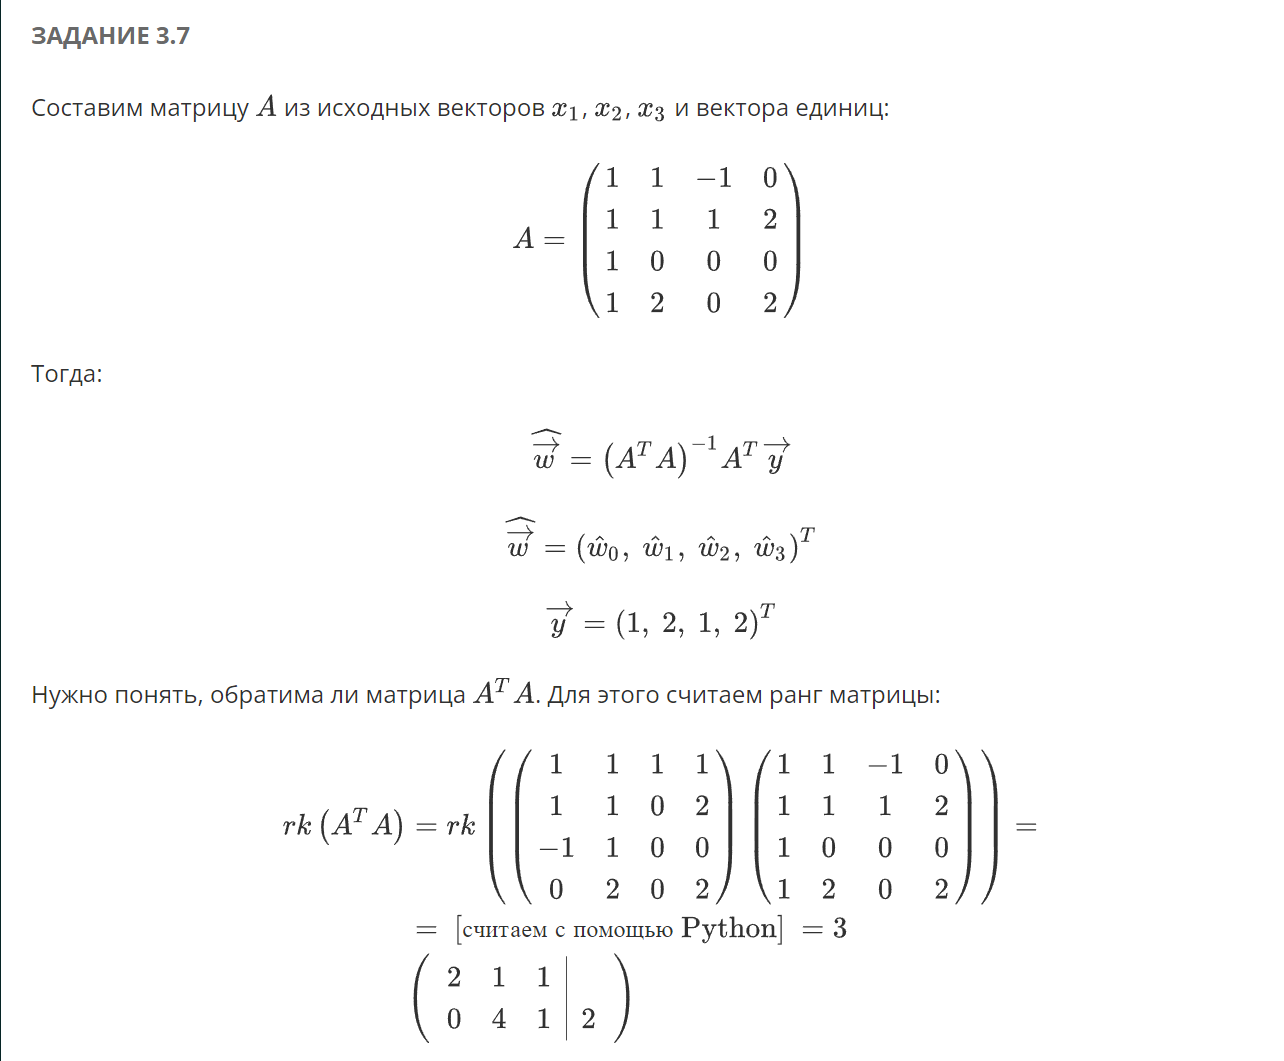

In [17]:
A = np.array([
    [1, 1, 1, 1],
    [1, 1, 0, 2],
    [-1, 1, 0, 0],
    [0, 2, 0, 2]
]).T
np.linalg.matrix_rank(A.T@A)
## 3

3

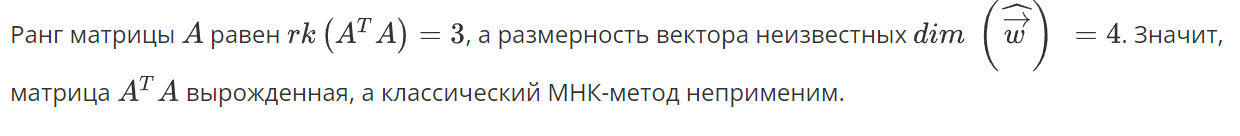